Veriyi temizlemek, işlemek ve görselleştirmek için gerekli kütüphanelerimizi dahil ediyorum.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

veri setini içeri aktarıyorum.


In [6]:
data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
print("Veri boyutu:", data.shape)

Veri boyutu: (145460, 23)


Veri setini incelediğim ilk adımlarda data.head() komutunu kullanarak verinin ilk birkaç satırını görüntülemeye çalıştım. Ancak bu işlemi yaptığımda konsolda kırmızı renkte bazı RuntimeWarning uyarı mesajlarıyla karşılaştım. Bu uyarılar, Pandas kütüphanesinin bazı sütunlarda bulunan çok küçük, çok büyük ya da eksik (NaN) değerleri yazdırmakta zorlanmasından kaynaklanıyor.

Bu nedenle, gereksiz uyarı mesajlarını bastırmak amacıyla aşağıdaki kodu başa ekledim.

In [8]:
import warnings
warnings.filterwarnings('ignore')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Veri setimdeki sayısal değişkenlerin dağılımını grafik olarak görmek için aşağıdaki kodu kullandım.

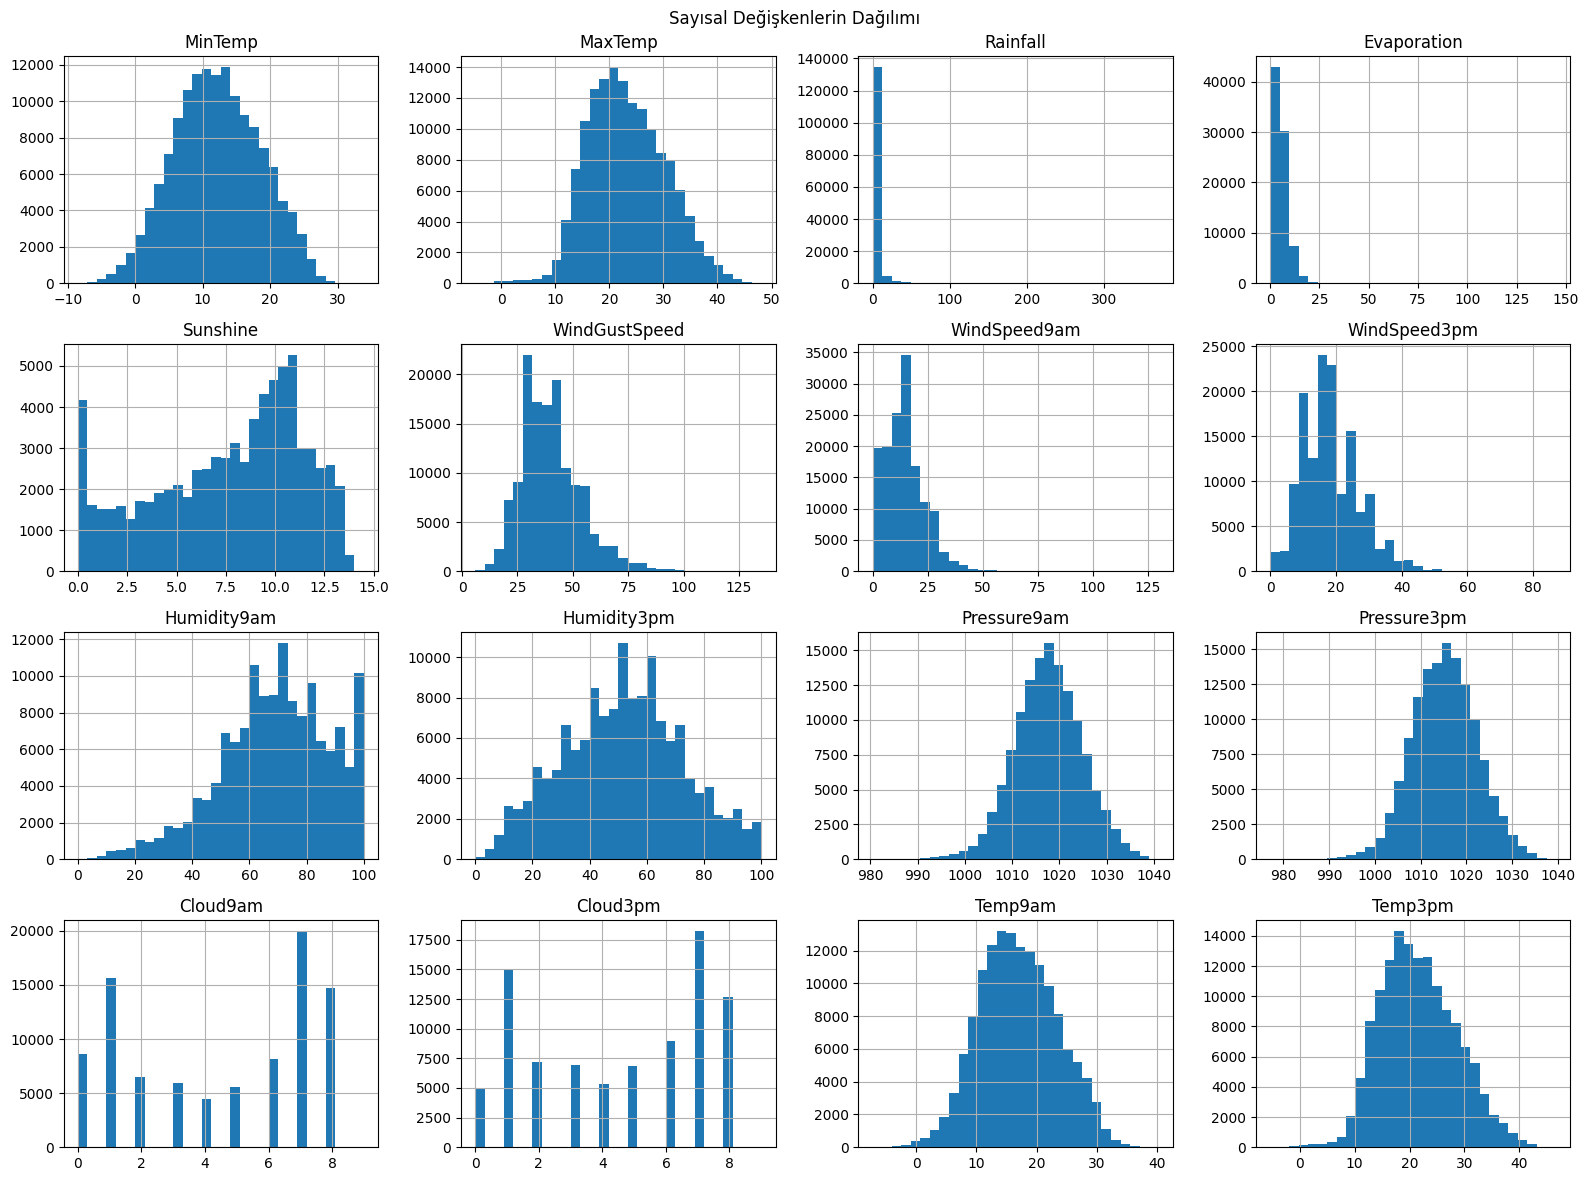

In [10]:
data.hist(figsize=(16, 12), bins=30)
plt.suptitle('Sayısal Değişkenlerin Dağılımı')
plt.tight_layout()
plt.show()


 Hedef sütun (RainTomorrow) dağılımını bakıyorum.

In [11]:
print(data['RainTomorrow'].value_counts())


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


“RainTomorrow” sınıfı hedef değişkenim olduğu için bu değişkenin sınıf dağılımını görmek istedim. 

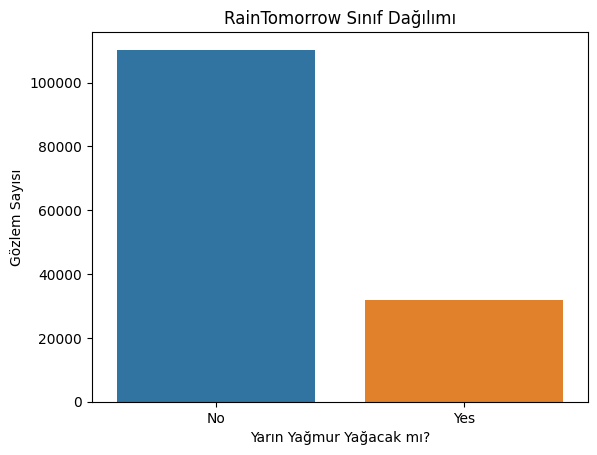

In [12]:
sns.countplot(x='RainTomorrow', data=data)
plt.title('RainTomorrow Sınıf Dağılımı')
plt.xlabel('Yarın Yağmur Yağacak mı?')
plt.ylabel('Gözlem Sayısı')
plt.show()

Sutünlardaki eksik verilerin sayısını çoktan aza doğru sıralıyorum.

In [13]:
data.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

RainToday değişkeni ile yağış miktarı arasında nasıl bir ilişki olduğunu görmek istedim. 

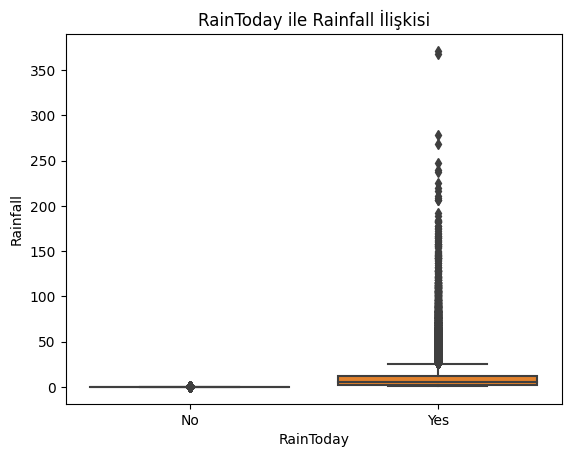

In [14]:
sns.boxplot(x='RainToday', y='Rainfall', data=data)
plt.title('RainToday ile Rainfall İlişkisi')
plt.show()


WindGustDir ile RainTomorrow değişkeni arasında anlamlı bir dağılım olup olmadığını analiz ettim.

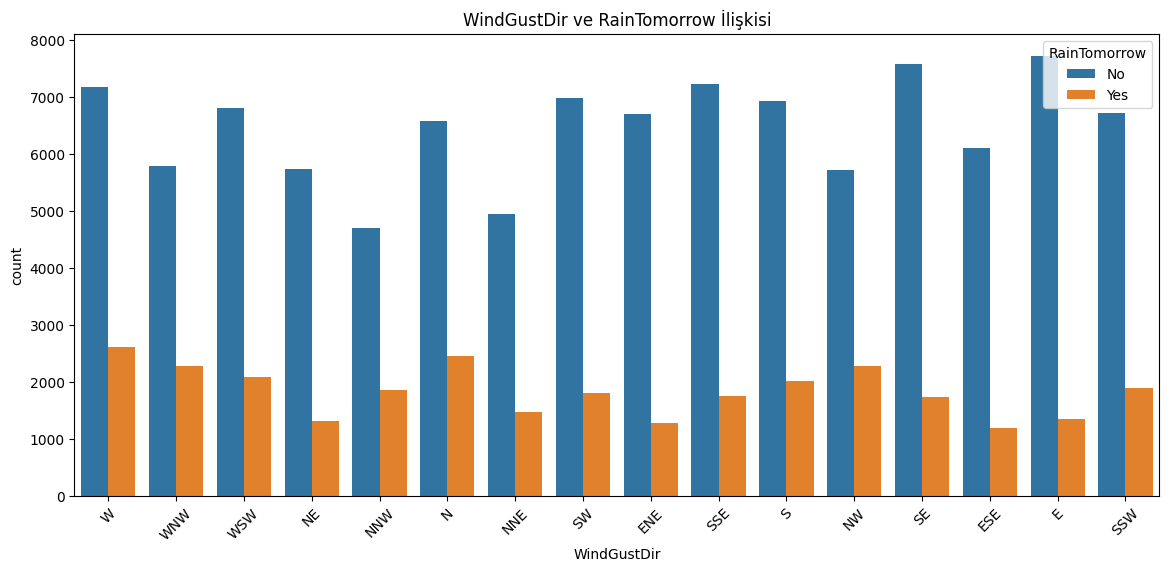

In [15]:
plt.figure(figsize=(14, 6))
sns.countplot(x='WindGustDir', hue='RainTomorrow', data=data)
plt.title("WindGustDir ve RainTomorrow İlişkisi")
plt.xticks(rotation=45)
plt.show()


Sıcaklık ve nem gibi sayısal değişkenler arasındaki ilişkiyi gözlemleyebilmek için bir dağılım grafiği çizdim. Renk ayrımını ise RainTomorrow değişkenine göre yaptım. Bu sayede yağmur yağan ve yağmayan günlerin bu iki değişken özelindeki dağılımlarını görmüş oldum.



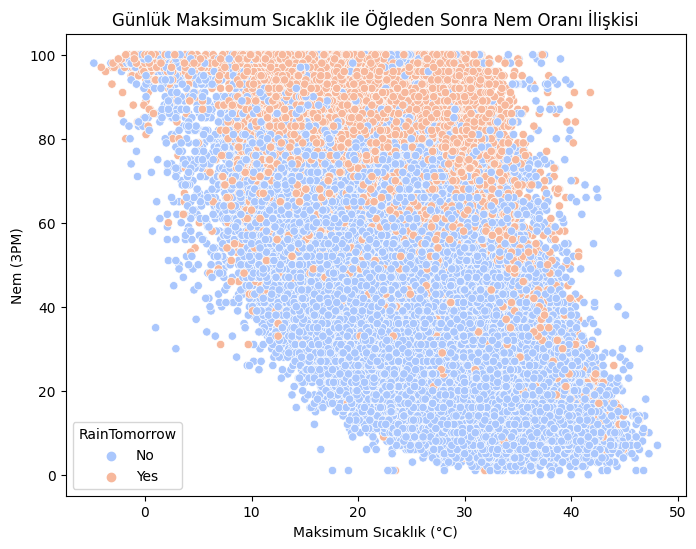

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="MaxTemp", y="Humidity3pm", hue="RainTomorrow", data=data, palette="coolwarm")
plt.title("Günlük Maksimum Sıcaklık ile Öğleden Sonra Nem Oranı İlişkisi")
plt.xlabel("Maksimum Sıcaklık (°C)")
plt.ylabel("Nem (3PM)")
plt.show()


Sayısal sütunlar arasında ilişki olup olmadığını görmek için önce sadece float64 tipindeki sütunları seçtim. Ardından bu değişkenler arasında korelasyon (ilişki) matrisini çizdim. Bu sayede bazı değişkenlerin birbiri ile ilişkilerini görmüş oldum.

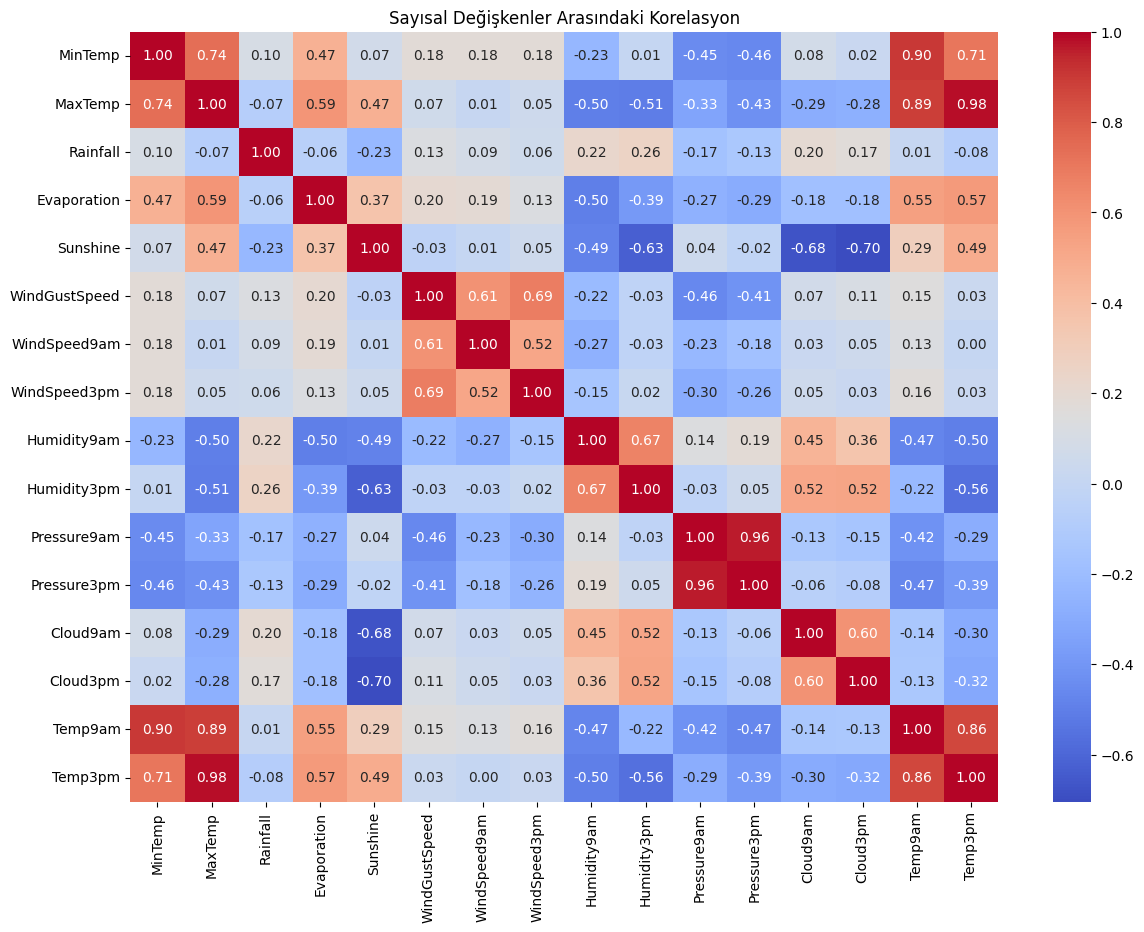

In [17]:
numeric_data = data.select_dtypes(include='float64')
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Sayısal Değişkenler Arasındaki Korelasyon")
plt.show()

In [18]:
data["RainTomorrow_binary"] = data["RainTomorrow"].map({"Yes": 1, "No": 0})

corr_matrix = numeric_data.copy()
corr_matrix["RainTomorrow_binary"] = data["RainTomorrow_binary"]
correlations = corr_matrix.corr()

cor_target = abs(correlations["RainTomorrow_binary"])

# 0.1'den büyük korelasyonları seç ve sırala
relevant_features = cor_target[cor_target > 0.1].sort_values(ascending=False)

print("RainTomorrow ile anlamlı korelasyona sahip özellikler:")
print(relevant_features)


RainTomorrow ile anlamlı korelasyona sahip özellikler:
RainTomorrow_binary    1.000000
Sunshine               0.450768
Humidity3pm            0.446160
Cloud3pm               0.381870
Cloud9am               0.317380
Humidity9am            0.257161
Pressure9am            0.246371
Rainfall               0.239032
WindGustSpeed          0.234010
Pressure3pm            0.226031
Temp3pm                0.192424
MaxTemp                0.159237
Evaporation            0.119285
Name: RainTomorrow_binary, dtype: float64


Korelasyon analizi sonucunda, RainTomorrow_binary değişkeni ile en yüksek korelasyona sahip özelliklerin Sunshine, Humidity3pm, Cloud3pm, Cloud9am ve Humidity9am olduğu görülmüştür. Bu özellikler, yarın yağmur yağıp yağmayacağını tahmin etmede önemli rol oynayabilecek değişkenlerdir.

Korelasyonu 0.1’den küçük olan değişkenler anlamlı bir ilişki göstermediği için modelde dikkate almadım.

In [19]:
data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')


Encoding öncesi verilerim:

In [20]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [21]:
#Label Encoding
data['RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})
data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

#One-Hot Encoding
one_hot_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)


RainToday ve RainTomorrow gibi iki sınıflı kategorik sütunları Label Encoding yöntemiyle sayısal formata dönüştürdüm. Ayrıca WindGustDir, WindDir9am ve WindDir3pm gibi çoklu kategorik sütunları One-Hot Encoding ile dönüştürerek modelin daha verimli çalışmasını sağladım. Böylece makine öğrenmesi algoritmalarının bu verileri anlayabileceği sayısal forma getirdim.

Encoding sonrası verilerim:

In [22]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,...,False,False,False,False,False,False,False,False,True,False
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,...,False,False,False,False,False,False,False,False,False,True
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,...,False,False,False,False,False,False,False,False,False,True
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,...,False,True,False,False,False,False,False,False,False,False


Pandas kütüphanesi encoding sonrası false ve true şeklinde 0 ve 1 leri tutuyor. Bunların doğruluğundan emin olmak için int e çevirme işlemi yaptım.

In [23]:
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)


In [24]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,...,0,1,0,0,0,0,0,0,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,...,0,0,0,0,0,0,0,1,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,50.0,20.0,24.0,...,0,0,0,0,0,0,0,1,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,...,0,0,0,0,0,0,0,1,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,80.0,7.0,28.0,...,0,1,0,0,0,0,0,0,0,0
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,28.0,15.0,11.0,...,0,0,0,0,1,0,0,0,0,0


Tablomda olan eksik (NaN) verileri doldurdum.

In [25]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

#Sütunlardaki eksik değerleri medyan ile dolduruyor
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)
    
print(data.isnull().sum())


Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 65, dtype: int64


Verilerimle olan işlerimi bitirdim. Artık modeli eğitip test etmeye geçebilirim .

RandomForest modeli ile test ediyorum. Bu yüzden test için gerekli kütüphaneleri ekledim.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Accuracy: 0.8517805582290664

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22717
         1.0       0.74      0.49      0.59      6375

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092


Confusion Matrix:
 [[21641  1076]
 [ 3236  3139]]

Özellik Önemleri:
 Humidity3pm        0.207829
Pressure3pm        0.114441
Humidity9am        0.101212
WindGustSpeed      0.094395
Rainfall           0.093635
Sunshine           0.082724
Cloud3pm           0.060047
WindGustDir_W      0.006475
WindDir3pm_W       0.006385
WindDir3pm_WNW     0.006263
WindDir9am_NW      0.006191
WindDir9am_N       0.006086
WindDir3pm_SE      0.006040
WindGustDir_S      0.006005
WindGustDir_WNW    0.005942
WindDir9am_W       0.005934
WindDir3pm_WSW     0.005911
WindGustDir_WSW    0.005847
WindGustDir_N      0.005832
WindDir3pm_N    

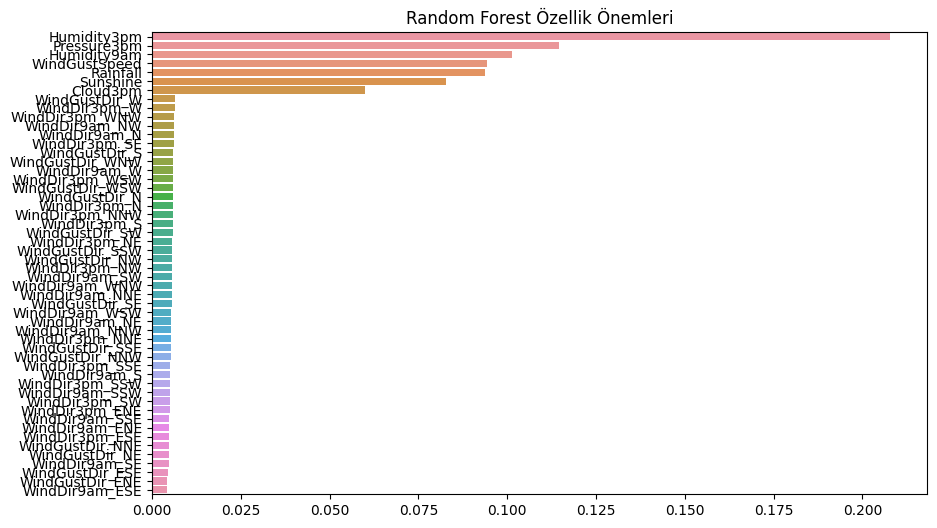

In [27]:
selected_features = [
    'Humidity3pm', 'Rainfall', 'Cloud3pm', 'Sunshine',
    'WindGustSpeed', 'Humidity9am', 'Pressure3pm'
]

# Rüzgar yönleri one-hot encoding sonrası kolonlar:
wind_dir_cols = [col for col in data.columns if col.startswith('WindGustDir_') or col.startswith('WindDir9am_') or col.startswith('WindDir3pm_')]

features = selected_features + wind_dir_cols
y = data['RainTomorrow'] 

# Eksik değer olan satırları sil:
data_clean = data.dropna(subset=features + ['RainTomorrow'])

X = data_clean[features]
y = data_clean.loc[data_clean.index, 'RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Sonuçları değerlendir:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nÖzellik Önemleri:\n", importances)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Random Forest Özellik Önemleri")
plt.show()

RandomForest modelini karışıklık matrisi (confusion matrix) ile görselleştirdim. Bu matris sayesinde modelin hangi sınıfları ne kadar doğru ya da yanlış tahmin ettiği kolayca anladım.



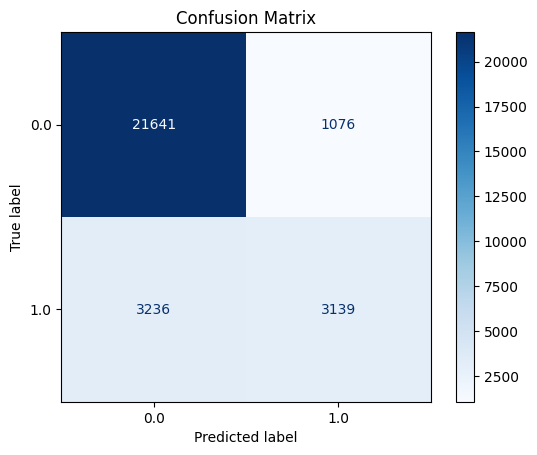

In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()


Modelin doğruluğundan emin olmak için başka modeller de deneyeceğim.

Şimdi de Lojik regresyon modeli ile test ediyorum.

Accuracy: 0.8340

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22672
         1.0       0.70      0.44      0.54      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.82      0.83      0.82     29092



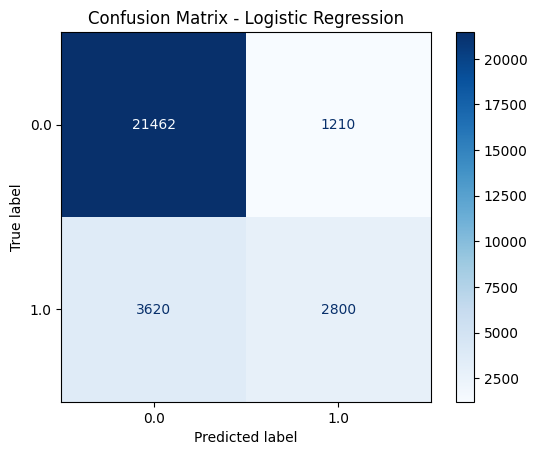

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = data[selected_features]
y = data['RainTomorrow'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Karar ağacı modeli ile test ediyorum.

Accuracy: 0.7717

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     22672
         1.0       0.48      0.50      0.49      6420

    accuracy                           0.77     29092
   macro avg       0.67      0.68      0.67     29092
weighted avg       0.77      0.77      0.77     29092



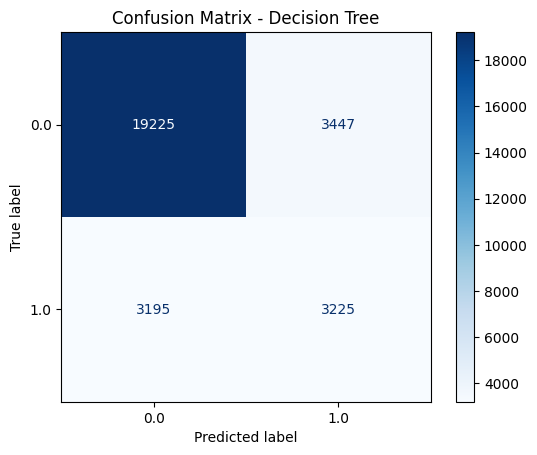

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Yaptığım denemelerde üç farklı model kullandım: Random Forest, Lojistik Regresyon ve Decision Tree. Sonuçlara baktığımda, Random Forest modelinin en yüksek doğruluk ve f1-skor değerlerine sahip olduğunu gördüm. Bu model özellikle “0” sınıfını yani yağmur yağmayacak günleri oldukça başarılı tahmin ediyor. Lojistik Regresyon ise diğer modellere göre biraz daha düşük performans gösterdi, özellikle “1” yani yağmur yağacak günleri tahmin etmede zorlandı. Decision Tree ise doğruluk açısından Lojistik Regresyon’dan iyi olsa da Random Forest’ın gerisinde kaldı.

Genel olarak, bu veride Random Forest modeli en dengeli ve başarılı sonuçları veren model olarak öne çıkıyor. Bu yüzden proje için Random Forest modelini tercih ettim.